# 🧠 Backpropagation: Full Tutorial from Scratch

This notebook walks through the fundamentals of backpropagation, from single-sample training to batch training, deep networks, and loss visualization.


## 1. Forward and Backward Pass Basics

### 🔁 Forward Pass

Given an input vector $x$, we pass it through:

1. Hidden layer:
$$
z^{[1]} = W^{[1]}x + b^{[1]}, \quad a^{[1]} = \sigma(z^{[1]})
$$

2. Output layer:
$$
z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}, \quad \hat{y} = \sigma(z^{[2]})
$$


### ⚠️ Loss Calculation

Mean Squared Error (MSE):
$$
L = \frac{1}{2}(y - \hat{y})^2
$$

---

### 🔄 Backward Pass

Output error:
$$
\delta^{[2]} = (\hat{y} - y) \cdot \sigma'(z^{[2]})
$$
Gradient:
$$
\frac{\partial L}{\partial W^{[2]}} = \delta^{[2]} (a^{[1]})^T, \quad \frac{\partial L}{\partial b^{[2]}} = \delta^{[2]}
$$

Hidden layer error:
$$
\delta^{[1]} = (W^{[2]})^T \delta^{[2]} \cdot \sigma'(z^{[1]})
$$
Gradient:
$$
\frac{\partial L}{\partial W^{[1]}} = \delta^{[1]} x^T, \quad \frac{\partial L}{\partial b^{[1]}} = \delta^{[1]}
$$


## 🔄 Step-by-Step Iteration Breakdown (Numbered)

### **Step 0: Initialization**

**0.1** Define input vector:
$$
x = \begin{bmatrix} 0.5 \\ 0.1 \end{bmatrix}
$$

**0.2** Define target output:
$$
y = 1
$$

**0.3** Initialize weights and biases:
- $W^{[1]}, W^{[2]}$ randomly
- $b^{[1]}, b^{[2]}$ as zeros

**0.4** Set learning rate:
$$
\eta = 0.1
$$

---

### **Step 1: Forward Pass**

**1.1** Compute hidden layer linear combination:
$$
z^{[1]} = W^{[1]}x + b^{[1]}
$$

**1.2** Apply activation function (e.g., sigmoid):
$$
a^{[1]} = \sigma(z^{[1]})
$$

**1.3** Compute output layer linear combination:
$$
z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}
$$

**1.4** Apply output activation:
$$
\hat{y} = a^{[2]} = \sigma(z^{[2]})
$$

---

### **Step 2: Compute Loss**

**2.1** Calculate Mean Squared Error loss:
$$
L = \frac{1}{2}(y - \hat{y})^2
$$

---

### **Step 3: Backward Pass (Gradients)**

#### Output Layer

**3.1** Compute output error:
$$
\delta^{[2]} = (\hat{y} - y) \cdot \sigma'(z^{[2]})
$$

**3.2** Compute gradients of weights and biases:
$$
\frac{\partial L}{\partial W^{[2]}} = \delta^{[2]} \cdot (a^{[1]})^T \\
\frac{\partial L}{\partial b^{[2]}} = \delta^{[2]}
$$

#### Hidden Layer

**3.3** Backpropagate error to hidden layer:
$$
\delta^{[1]} = (W^{[2]})^T \delta^{[2]} \cdot \sigma'(z^{[1]})
$$

**3.4** Compute gradients of weights and biases:
$$
\frac{\partial L}{\partial W^{[1]}} = \delta^{[1]} \cdot x^T \\
\frac{\partial L}{\partial b^{[1]}} = \delta^{[1]}
$$

---

### **Step 4: Parameter Updates (Gradient Descent)**

**4.1** Update weights:
$$
W^{[l]} := W^{[l]} - \eta \cdot \frac{\partial L}{\partial W^{[l]}}
$$

**4.2** Update biases:
$$
b^{[l]} := b^{[l]} - \eta \cdot \frac{\partial L}{\partial b^{[l]}}
$$

- W2 -= lr * dW2
- b2 -= lr * db2
- W1 -= lr * dW1
- b1 -= lr * db1
---



# Python

In [1]:
import numpy as np

# Activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize input and parameters
x = np.array([[0.5], [0.1]])
y = np.array([[1]])

W1 = np.random.randn(2, 2)
b1 = np.zeros((2, 1))
W2 = np.random.randn(1, 2)
b2 = np.zeros((1, 1))

# Forward pass
z1 = W1 @ x + b1
a1 = sigmoid(z1)
z2 = W2 @ a1 + b2
a2 = sigmoid(z2)  # prediction

# Compute loss (MSE)
loss = 0.5 * (y - a2)**2

# Backward pass
delta2 = (a2 - y) * sigmoid_derivative(z2)
dW2 = delta2 @ a1.T
db2 = delta2

delta1 = (W2.T @ delta2) * sigmoid_derivative(z1)
dW1 = delta1 @ x.T
db1 = delta1

# Parameter update
lr = 0.1
W2 -= lr * dW2
b2 -= lr * db2
W1 -= lr * dW1
b1 -= lr * db1

print("Loss:", loss.item())
print("Output prediction:", a2)
print("Gradient dW2:\n", dW2)
print("Gradient dW1:\n", dW1)
print("Updated W1:\n", W1)
print("Updated W2:\n", W2)


Loss: 0.1752147054357043
Output prediction: [[0.40802921]]
Gradient dW2:
 [[-0.0534379 -0.1023696]]
Gradient dW1:
 [[-0.0073378  -0.00146756]
 [ 0.01088514  0.00217703]]
Updated W1:
 [[-0.72495515 -1.53390139]
 [ 1.71161694  0.68057321]]
Updated W2:
 [[ 0.44385884 -0.73843111]]


Epoch 000 | Loss: 0.056517 | Prediction: 0.6638
Epoch 010 | Loss: 0.045831 | Prediction: 0.6972
Epoch 020 | Loss: 0.037991 | Prediction: 0.7244
Epoch 030 | Loss: 0.032107 | Prediction: 0.7466
Epoch 040 | Loss: 0.027592 | Prediction: 0.7651
Epoch 050 | Loss: 0.024053 | Prediction: 0.7807
Epoch 060 | Loss: 0.021227 | Prediction: 0.7940
Epoch 070 | Loss: 0.018932 | Prediction: 0.8054
Epoch 080 | Loss: 0.017038 | Prediction: 0.8154
Epoch 090 | Loss: 0.015456 | Prediction: 0.8242
Epoch 099 | Loss: 0.014242 | Prediction: 0.8312


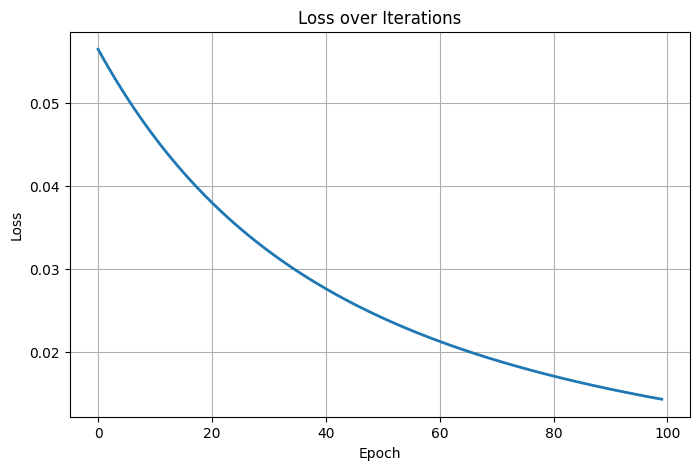

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Input and target
x = np.array([[0.5], [0.1]])
y = np.array([[1]])

# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(2, 2)
b1 = np.zeros((2, 1))
W2 = np.random.randn(1, 2)
b2 = np.zeros((1, 1))

# Hyperparameters
lr = 0.1
epochs = 100
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    # Compute loss
    loss = 0.5 * (y - a2)**2
    loss_history.append(loss.item())

    # Backward pass
    delta2 = (a2 - y) * sigmoid_derivative(z2)
    dW2 = delta2 @ a1.T
    db2 = delta2

    delta1 = (W2.T @ delta2) * sigmoid_derivative(z1)
    dW1 = delta1 @ x.T
    db1 = delta1

    # Update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # Optional print
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.6f} | Prediction: {a2.item():.4f}")

# Plotting loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_history, linewidth=2)
plt.title("Loss over Iterations")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Epoch 000 | Loss: 0.693256
Epoch 010 | Loss: 0.692922
Epoch 020 | Loss: 0.692576
Epoch 030 | Loss: 0.692144
Epoch 040 | Loss: 0.691598
Epoch 050 | Loss: 0.691104
Epoch 060 | Loss: 0.690533
Epoch 070 | Loss: 0.689910
Epoch 080 | Loss: 0.689115
Epoch 090 | Loss: 0.688103
Epoch 099 | Loss: 0.686937


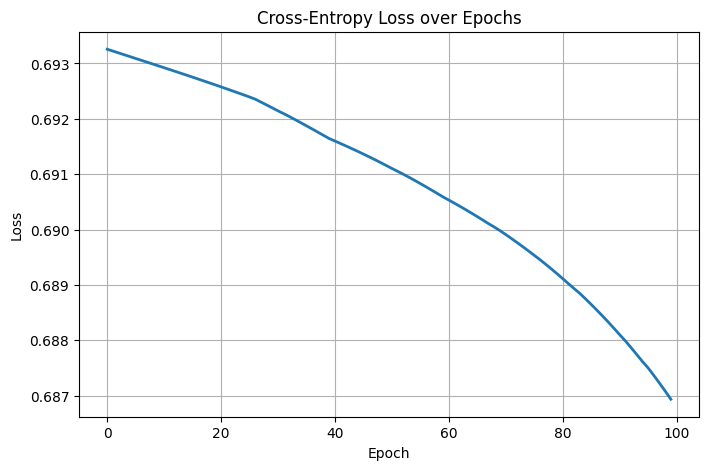

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # stability trick
    return e_z / np.sum(e_z, axis=0, keepdims=True)

# Cross-entropy loss for softmax output
def cross_entropy(y_true, y_pred):
    m = y_true.shape[1]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

# === Input Data (2D -> 2-class classification) ===
X = np.array([[0.5, 0.1, 0.9, 0.3],
              [0.1, 0.8, 0.3, 0.7]])  # shape: (2, 4)

# One-hot encoded labels (2 classes)
Y = np.array([[1, 0, 1, 0],
              [0, 1, 0, 1]])          # shape: (2, 4)

# Seed & initialization
np.random.seed(0)
W1 = np.random.randn(4, 2) * 0.1  # (4, 2)
b1 = np.zeros((4, 1))
W2 = np.random.randn(3, 4) * 0.1  # (3, 4)
b2 = np.zeros((3, 1))
W3 = np.random.randn(2, 3) * 0.1  # (2, 3)
b3 = np.zeros((2, 1))

lr = 0.1
epochs = 100
loss_history = []

# === Training Loop ===
for epoch in range(epochs):
    # ---- Forward Pass ----
    Z1 = W1 @ X + b1        # (4, 4)
    A1 = relu(Z1)           # (4, 4)

    Z2 = W2 @ A1 + b2       # (3, 4)
    A2 = relu(Z2)           # (3, 4)

    Z3 = W3 @ A2 + b3       # (2, 4)
    A3 = softmax(Z3)        # (2, 4)

    # ---- Loss ----
    loss = cross_entropy(Y, A3)
    loss_history.append(loss)

    # ---- Backward Pass ----
    m = X.shape[1]

    dZ3 = A3 - Y                    # (2, 4)
    dW3 = dZ3 @ A2.T / m           # (2, 3)
    db3 = np.mean(dZ3, axis=1, keepdims=True)

    dA2 = W3.T @ dZ3               # (3, 4)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = dZ2 @ A1.T / m           # (3, 4)
    db2 = np.mean(dZ2, axis=1, keepdims=True)

    dA1 = W2.T @ dZ2               # (4, 4)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = dZ1 @ X.T / m            # (4, 2)
    db1 = np.mean(dZ1, axis=1, keepdims=True)

    # ---- Update ----
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # ---- Print every 10 epochs ----
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:03d} | Loss: {loss:.6f}")

# ---- Plotting ----
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_history, linewidth=2)
plt.title("Cross-Entropy Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
